In [153]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras import backend as k
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

In [154]:
from keras.preprocessing import image
from keras.applications import imagenet_utils

In [155]:
def prepare_image(file):
    img_path = 'Desktop/'
    img = image.load_img(img_path + file, target_size = (224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis = 0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)


In [156]:
#preprocessed_image = prepare_image('0833.jpg')

In [157]:
#predictions = mobile.predict(preprocessed_image)
#results = imagenet_utils.decode_predictions(predictions)

In [158]:
train_path = 'Desktop/chest_xray/train'
valid_path = 'Desktop/chest_xray/val'
test_path = 'Desktop/chest_xray/test'

In [159]:
train_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path, target_size = (224,224), batch_size = 5)
valid_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path, target_size = (224,224), batch_size = 5)
test_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path, target_size = (224,224), batch_size = 5, shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 620 images belonging to 2 classes.


In [160]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [161]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [162]:
x = mobile.layers[-6].output

In [163]:
prediction = Dense(2,activation = 'softmax')(x)

In [164]:
model = tf.keras.Model(inputs = mobile.input, outputs = prediction)

In [165]:
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)    

In [166]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [167]:
model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [168]:
model.fit_generator(train_batches, steps_per_epoch=50, validation_data = valid_batches, validation_steps = 4, epochs = 10, verbose = 2)

Epoch 1/10
50/50 - 7s - loss: 0.3878 - accuracy: 0.8640 - val_loss: 1.2433 - val_accuracy: 0.7500
Epoch 2/10
50/50 - 7s - loss: 0.2466 - accuracy: 0.9160 - val_loss: 12.0677 - val_accuracy: 0.5000
Epoch 3/10
50/50 - 7s - loss: 0.2782 - accuracy: 0.9000 - val_loss: 2.2325 - val_accuracy: 0.5625
Epoch 4/10
50/50 - 6s - loss: 0.2238 - accuracy: 0.9228 - val_loss: 3.4190 - val_accuracy: 0.5625
Epoch 5/10
50/50 - 7s - loss: 0.1763 - accuracy: 0.9560 - val_loss: 3.2689 - val_accuracy: 0.5000
Epoch 6/10
50/50 - 7s - loss: 0.1170 - accuracy: 0.9680 - val_loss: 0.8907 - val_accuracy: 0.8750
Epoch 7/10
50/50 - 7s - loss: 0.2542 - accuracy: 0.9320 - val_loss: 0.2262 - val_accuracy: 0.8750
Epoch 8/10
50/50 - 7s - loss: 0.1748 - accuracy: 0.9360 - val_loss: 0.0645 - val_accuracy: 1.0000
Epoch 9/10
50/50 - 7s - loss: 0.0697 - accuracy: 0.9640 - val_loss: 0.1617 - val_accuracy: 0.8750
Epoch 10/10
50/50 - 7s - loss: 0.0765 - accuracy: 0.9600 - val_loss: 0.1853 - val_accuracy: 0.9375


In [170]:
test_labels = test_batches.classes

In [171]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [172]:
test_batches.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [178]:
predictions = model.predict_generator(test_batches, steps = 124, verbose = 0)

In [198]:
def plot_confusion_matrix(cm, classes, normalize=False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astyle('float')/cm.sum(axis = 1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],horizontalalignment = 'center', color = 'white' if cm[i,j]>thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
            

In [199]:
an = predictions.argmax(axis=-1)

In [200]:
print(an)

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [201]:
print(an.shape)
print(test_labels.shape)

(620,)
(620,)


In [202]:
cm = confusion_matrix(test_labels, an)

In [203]:
test_batches.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [195]:
cm_plot_labels = ['NORMAL', 'PNEUMONIA']

Confusion Matrix, without normalization
[[154  80]
 [  4 382]]


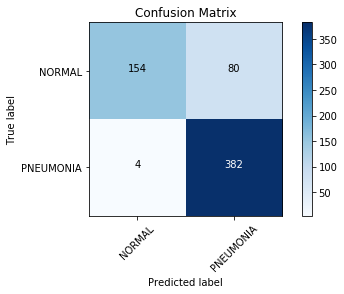

In [204]:
plot_confusion_matrix(cm, cm_plot_labels,title='Confusion Matrix')
